# Resolución Trabajo Práctico 01

## Integrantes

- Gaspar Acevedo Zain

## Código para la resolución

### Imports y carga del dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_sneep_2023_csv = pd.read_csv("../dataset/sneep-2023.csv")

### Pre-análisis del dataset: columnas IDs

In [ ]:
# Mostramos las 10 primeras filas
df_sneep_2023_csv.head(10)

,censo_anio,provincia_sneep_id,provincia_descripcion,establecimiento_id,establecimiento_descripcion,edad,genero_id,genero_descripcion,nacionalidad_id,nacionalidad_descripcion,...,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_id,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_id,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,2023,23,Tucumán,163,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,57,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,90,90.0
1,2023,23,Tucumán,163,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,34,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,90,90.0
2,2023,1,Buenos Aires,162,UNIDAD 30 - GENERAL ALVEAR,42,1,Varón,1,Argentina,...,NaN,0,NaN,0,NaN,0,NaN,NaN,6,6.0
3,2023,1,Buenos Aires,162,UNIDAD 30 - GENERAL ALVEAR,36,1,Varón,1,Argentina,...,NaN,0,NaN,0,NaN,0,NaN,NaN,6,86.0
4,2023,17,San Juan,48,"SERVICIO PENITENCIARIO PROVINCIAL ""CRIO. GRAL....",25,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,70,70.0
5,2023,17,San Juan,48,"SERVICIO PENITENCIARIO PROVINCIAL ""CRIO. GRAL....",37,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,70,70.0
6,2023,17,San Juan,48,"SERVICIO PENITENCIARIO PROVINCIAL ""CRIO. GRAL....",37,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,70,70.0
7,2023,17,San Juan,48,"SERVICIO PENITENCIARIO PROVINCIAL ""CRIO. GRAL....",38,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,70,70.0
8,2023,1,Buenos Aires,141,UNIDAD 4 - BAHIA BLANCA,39,1,Varón,1,Argentina,...,NaN,0,NaN,0,NaN,0,NaN,NaN,6,6.0
9,2023,20,Santa Fe,150,UNIDAD Nº 1 INSTITUTO CORREC. MODELO DR.TABAR...,47,1,Varón,1,Argentina,...,NaN,0,NaN,0,NaN,0,NaN,NaN,82,14.0


In [ ]:
# Identificamos las columnas que corresponden a IDs
columnas_id = []

for column_name in df_sneep_2023_csv.columns:
    # Agregamos aquellas que tienen sufijo "_id"
    "_id" in column_name and columnas_id.append(column_name)

In [ ]:
# Validamos que todas las columnas con sufijo "_id" tengan una columna equivalente con sufijo "_descripcion"
columnas_id_sin_descripcion = []

for column_name in columnas_id:
    not (column_name.replace("_id", "_descripcion") in df_sneep_2023_csv.columns) and columnas_id_sin_descripcion.append(column_name)

In [36]:
columnas_id_provincias = []
# Obtenemos las columnas que se refieran a las provincias
for column_name in df_sneep_2023_csv.columns:
    # Agregamos aquellas que tienen sufijo "_id"
    "provincia" in column_name and columnas_id_provincias.append(column_name)

In [ ]:
# Generamos una nueva lista, en donde sacamos las columnas que refieren a ID de provincias del resto que refiere a IDs
columnas_id_no_provincias = list(set(columnas_id) - set(columnas_id_provincias))

### Generamos un nuevo dataset sin columnas IDs

In [42]:
df_sneep_no_ids_csv = df_sneep_2023_csv.drop(columns=columnas_id_no_provincias)

In [87]:
df_sneep_no_ids_csv["jurisdiccion_descripcion"].unique()

array(['FEDERAL', 'PROVINCIAL - Tucumán', 'PROVINCIAL - Buenos Aires',
       'PROVINCIAL - San Juan', 'PROVINCIAL - Santa Fe',
       'PROVINCIAL - Córdoba', 'PROVINCIAL - Mendoza',
       'PROVINCIAL - Entre Rios', 'PROVINCIAL - Chaco',
       'PROVINCIAL - San Luis', 'PROVINCIAL - La Pampa',
       'PROVINCIAL - Santiago del Estero', 'NACIONAL',
       'PROVINCIAL - Rio Negro', 'PROVINCIAL - Neuquén',
       'PROVINCIAL - Salta', 'PROVINCIAL - Santa Cruz',
       'PROVINCIAL - Chubut', 'Justicia de la Ciudad de Buenos Aires',
       'PROVINCIAL - Corrientes', 'PROVINCIAL - Misiones',
       'PROVINCIAL - Catamarca', nan, 'PROVINCIAL - Jujuy',
       'PROVINCIAL - Formosa', 'PROVINCIAL - Tierra del Fuego',
       'PROVINCIAL - La Rioja'], dtype=object)

## Histogramas

In [ ]:
df_sneep_no_ids_csv["tuvo_reduccion_pena_descripcion"].value_counts(dropna=False)

tuvo_reduccion_pena_descripcion
No tuvo reducción de pena    60165
NaN                          48275
Si - Hasta 6 meses            3087
Si - Hasta 1 año               254
Si - Mas de 1 año              186
Name: count, dtype: int64

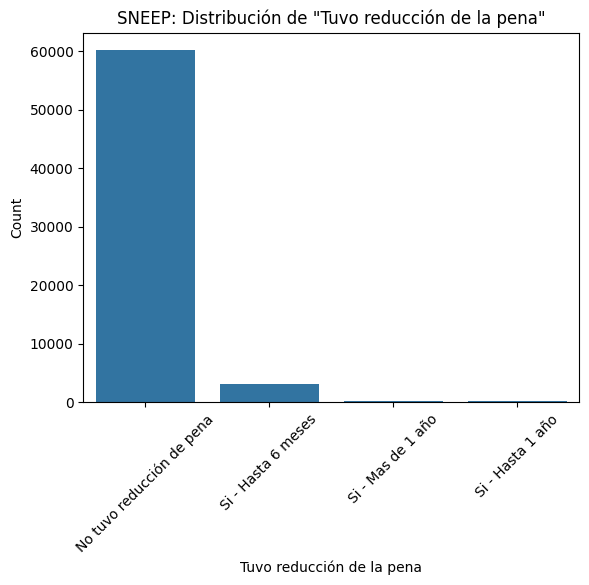

In [ ]:
# Graficamos la distribución de la columna tuvo_reduccion_pena_descripcion
sns.countplot(x='tuvo_reduccion_pena_descripcion', data=df_sneep_no_ids_csv)
plt.title("SNEEP: Distribución de \"Tuvo reducción de la pena\"")
plt.xticks(rotation=45) 
plt.xlabel("Tuvo reducción de la pena")
plt.ylabel("Count")
plt.show()

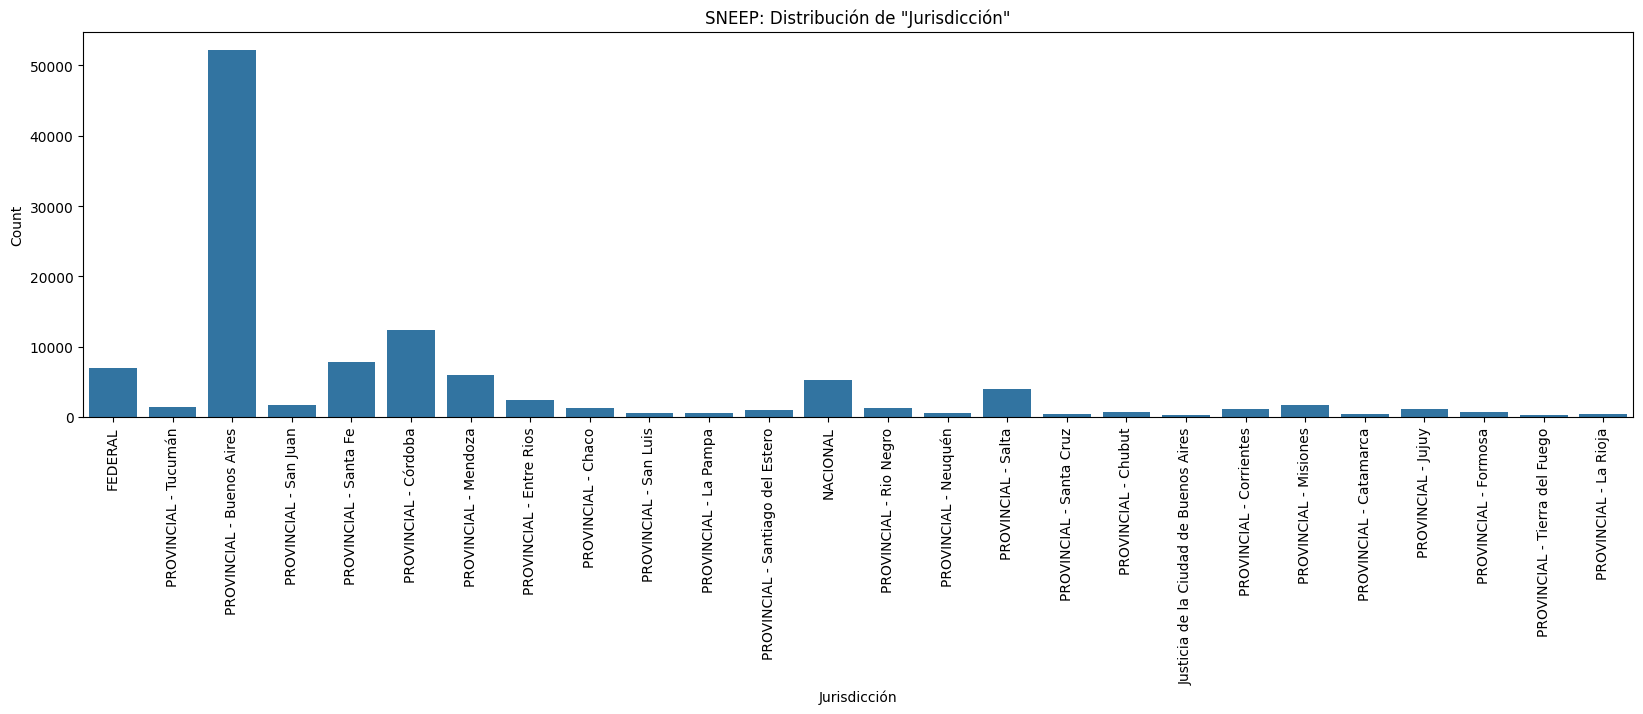

In [97]:
# Graficamos la distribución de la columna tuvo_reduccion_pena_descripcion
plt.figure(figsize=(20, 5))
sns.countplot(x='jurisdiccion_descripcion', data=df_sneep_no_ids_csv)
plt.title("SNEEP: Distribución de \"Jurisdicción\"")
plt.xticks(rotation=90) 
plt.xlabel("Jurisdicción")
plt.ylabel("Count")
plt.show()

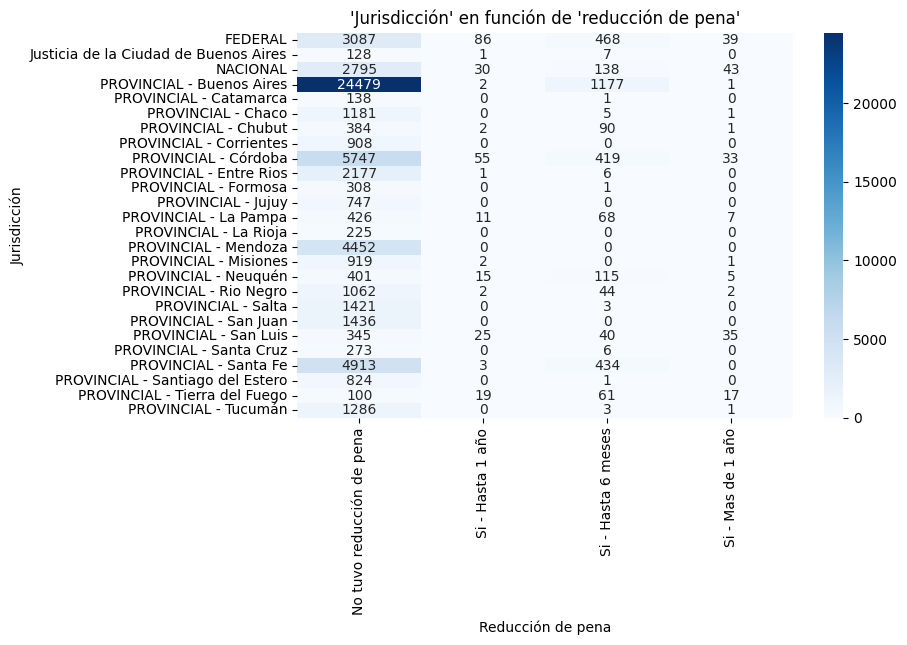

In [ ]:
# Graficamos la Jurisdicción en función de la reducción de pena
plt.figure(figsize=(8, 5))
cross_tab = pd.crosstab(df_sneep_no_ids_csv['jurisdiccion_descripcion'], df_sneep_no_ids_csv['tuvo_reduccion_pena_descripcion'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('\'Jurisdicción\' en función de la \'reducción de pena\'')
plt.xlabel('Reducción de pena')
plt.ylabel('Jurisdicción')
plt.show()

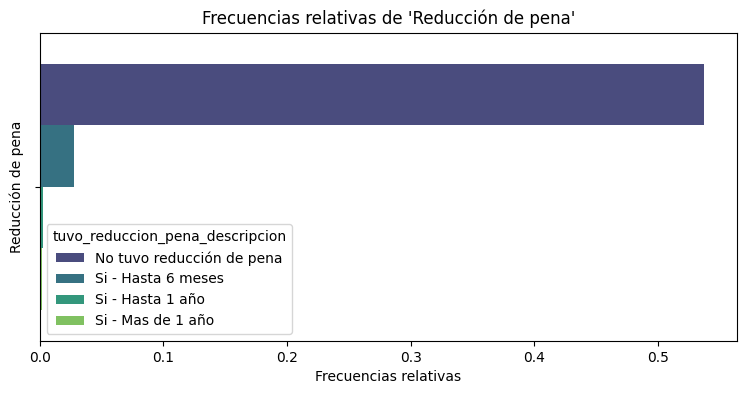

In [101]:
# Calcular frecuencias relativas
total = len(df_sneep_no_ids_csv)
relative_freq = df_sneep_no_ids_csv['tuvo_reduccion_pena_descripcion'].value_counts(dropna=False) / total

# Graficar frecuencias relativas
plt.figure(figsize=(9, 4))
sns.barplot(x=relative_freq.values, hue=relative_freq.index, palette='viridis')
plt.title('Frecuencias relativas de \'Reducción de pena\'')
plt.xlabel('Frecuencias relativas')
plt.ylabel('Reducción de pena')
plt.show()